import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import string

data=pd.read_csv("fake_job_postings.csv")

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.shape

(17880, 18)

In [ ]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [ ]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.fillna(' ', inplace=True)

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]
# Store the variable we are predicting 
target = "fraudulent"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
  
df3 = pd.DataFrame(y_res)
  
# the default behaviour is join='outer'
# inner join
  
result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
17087,VP of Sales,"CA, QC, Montreal",,Be part of a Global SolutionYou want to use yo...,The VP of Sales leads and directs a sales team...,Examples of Duties: (Includes but is not limit...,To be negotiated,,,,,,0
14715,Finance Analyst,"GB, , London",,About the CompanyWe are ticketscript - the Eur...,About the CompanyWe are ticketscript - the Eur...,"Your profileYou are a motivated, optimistic an...",Our offerA full time position within our inter...,Full-time,Associate,Master's Degree,Events Services,,0
7539,Account Manager,"US, PA, Philadelphia",,We launched Involvio as students at Drexel Uni...,Description goes hereResponsibilitiesSupport m...,4-year degreeYou have a track of successful pe...,Cool midtown office close to Grand CentralHeal...,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Business Development,0
1975,Internal Auditor,"US, OK, Oklahoma City",,Valor Services provides Workforce Solutions th...,This is an amazing job opportunity with one of...,"Education:Bachelor’s degree in accounting, man...",Strong compensation packages available commens...,Full-time,,,Oil & Energy,,0
1888,Senior .NET Developer - Phoenix AZ,"US, AZ, Phoenix",IT,,Link to apply for position:&nbsp;#URL_6a341499...,Desired Qualifications:Experience with:-Operat...,,,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
17829,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
17830,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [ ]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

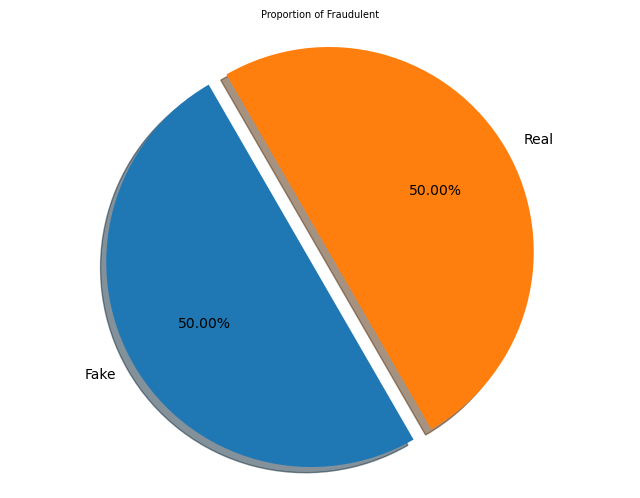

In [ ]:
labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [ ]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

17087    CA
14715    GB
7539     US
1975     US
1888     US
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 1732, dtype: object

In [ ]:
data['country'].nunique()

49

In [ ]:
# top 10 country that post jobs 
data['country'].value_counts()[:11]
     

country
US    1245
GB     146
AU      47
GR      46
        41
CA      29
IN      27
NZ      17
MY      12
PL      12
DE       7
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

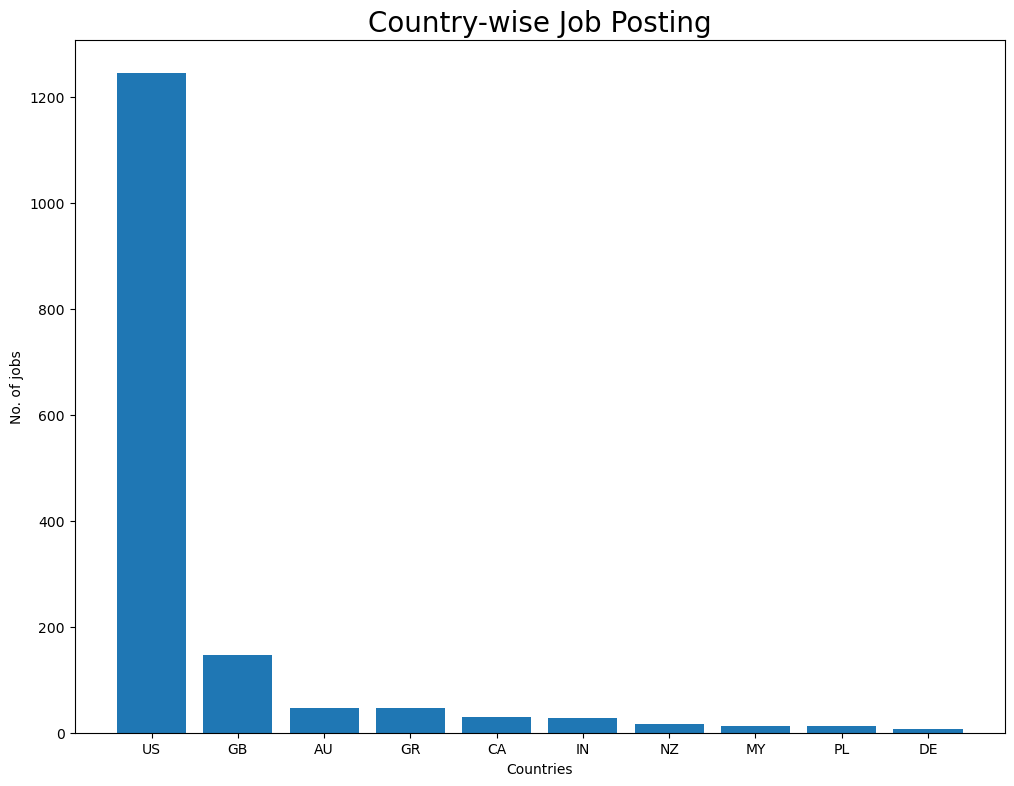

In [ ]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [ ]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'GR', 'CA', 'IN', 'NZ', 'MY', 'PL', 'DE'])

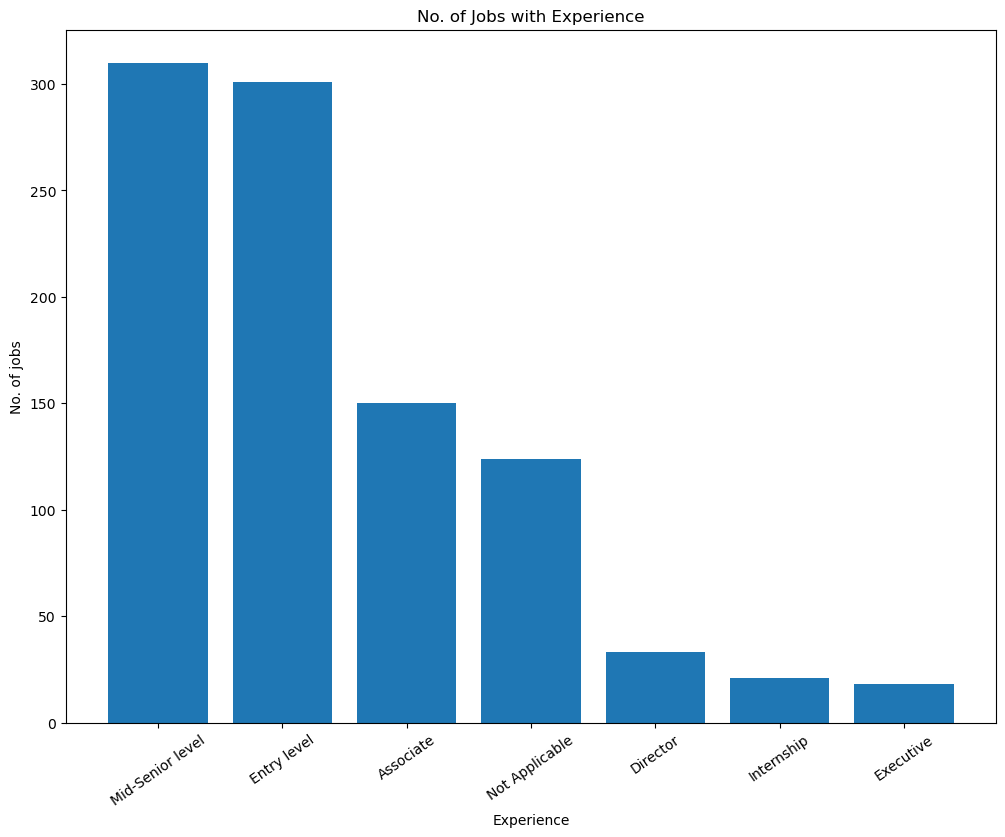

In [ ]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()
     

In [ ]:
#Most frequent jobs
print(data.title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Customer Service Representative                                         19
Administrative Assistant                                                17
English Teacher Abroad                                                  14
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Network Marketing                                                       10
Data Entry                                                              10
Name: count, dtype: int64


In [ ]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [ ]:
# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']
     

In [ ]:
data.head()

,fraudulent,text
17087,0,"VP of Sales CA, QC, Montreal Be part of a Glob..."
14715,0,"Finance Analyst GB, , London About the Company..."
7539,0,"Account Manager US, PA, Philadelphia We launch..."
1975,0,"Internal Auditor US, OK, Oklahoma City Valor S..."
1888,0,"Senior .NET Developer - Phoenix AZ US, AZ, Pho..."


In [ ]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]]) 
     

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

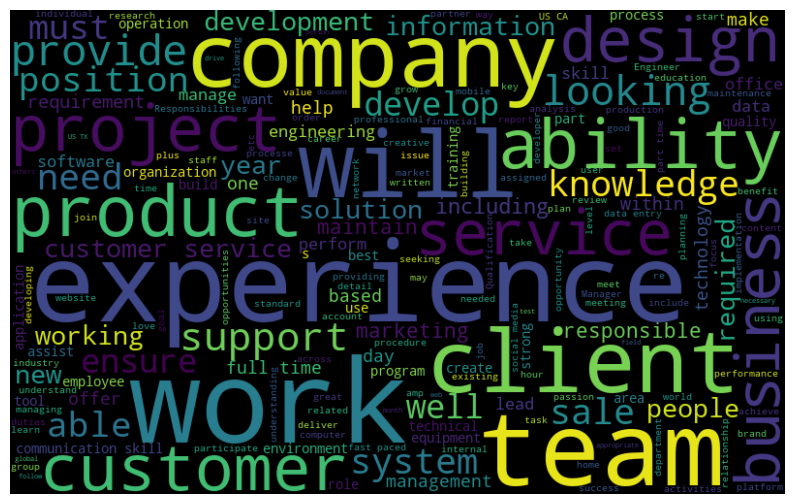

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)

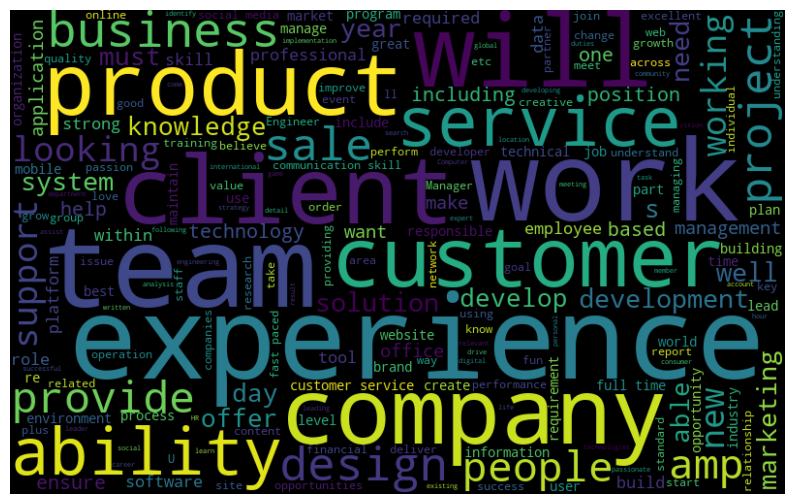

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
     

In [ ]:
fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

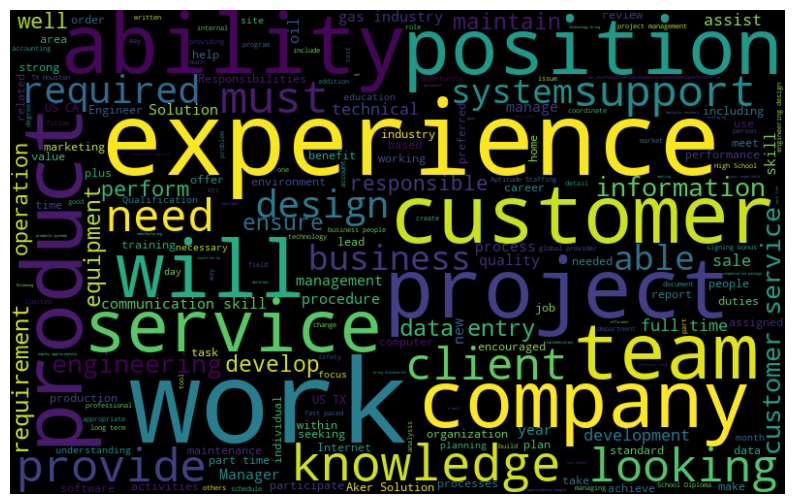

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91939\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#loading the stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
#converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [ ]:
#removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'data'
print(data.columns)  # Print column names to ensure 'text' is one of them
print(data.head())   # Print the first few rows to check the content of the DataFrame

# Check if the 'text' column exists and the DataFrame is not empty
if 'text' in data.columns and not data.empty:
    print(data['text'].iloc[0])  # Use iloc to access the first element in the 'text' column
else:
    print("The 'text' column does not exist or the DataFrame is empty")


Index(['fraudulent', 'text'], dtype='object')
       fraudulent                                               text
17087           0  vp sales ca, qc, montreal part global solution...
14715           0  finance analyst gb, , london companywe tickets...
7539            0  account manager us, pa, philadelphia launched ...
1975            0  internal auditor us, ok, oklahoma city valor s...
1888            0  senior .net developer - phoenix az us, az, pho...
vp sales ca, qc, montreal part global solutionyou want use talents create something new, something revolutionary, something change construction industry works. passionate creating beautiful solutions complex problems.you want company values skills, one employees say goes product look, closed doors learn teach, every single day? welcome protenders. vp sales leads directs sales team department meet exceed sales revenue, sales profitability budgetary objectives. role involves strategic planning, managing people, selling, leveraging techn

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [ ]:
print(y_train)
print(X_train)

3881     1
17724    1
6985     1
708      0
4145     1
        ..
6690     1
7555     0
6285     1
14052    0
1801     0
Name: fraudulent, Length: 1212, dtype: int64
3881     earn nice part time pay! us, , demand. looking...
17724    accounts payable clerk us, mi, farmington hill...
6985     oil/gas technical manager us, tx, houston job ...
708      customer service associate - part time us, il,...
4145     payroll clerk us, ia, des moines dyncorp inter...
                               ...                        
6690     market operations manager us, tx, austin accio...
7555     internship: copywriting & social media new onl...
6285     senior engineer shawnee, ks us, ks, shawnee 1....
14052    entry level sales us, pa, pittsburgh general s...
1801     senior c++ linux developer - iasi ro, is, iasi...
Name: text, Length: 1212, dtype: object


In [ ]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

In [ ]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 1)	2
  (0, 33)	1
  (0, 38)	4
  (0, 87)	1
  (0, 202)	2
  (0, 275)	2
  (0, 279)	2
  (0, 424)	2
  (0, 432)	2
  (0, 492)	1
  (0, 581)	1
  (0, 697)	1
  (0, 835)	1
  (0, 1046)	2
  (0, 1148)	1
  (0, 1184)	1
  (0, 1186)	1
  (0, 1222)	1
  (0, 1355)	1
  (0, 1482)	1
  (0, 1583)	2
  (0, 1699)	1
  (0, 1865)	1
  (0, 2026)	1
  (0, 2030)	1
  :	:
  (1211, 17008)	2
  (1211, 17292)	1
  (1211, 17320)	1
  (1211, 17390)	1
  (1211, 17404)	1
  (1211, 17521)	1
  (1211, 17528)	1
  (1211, 17545)	2
  (1211, 17661)	1
  (1211, 17717)	1
  (1211, 17789)	2
  (1211, 17808)	2
  (1211, 18000)	1
  (1211, 18057)	1
  (1211, 18101)	1
  (1211, 18385)	1
  (1211, 18394)	1
  (1211, 18847)	1
  (1211, 19214)	1
  (1211, 19831)	1
  (1211, 19946)	1
  (1211, 20011)	1
  (1211, 20016)	1
  (1211, 20076)	1
  (1211, 20115)	1


In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x20432 sparse matrix of type '<class 'numpy.int64'>'
	with 84447 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to 
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 4.18 ms


MultinomialNB()

In [ ]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 

NB Classification Accuracy: 0.8980769230769231
NB Classification Report

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       260
           1       0.88      0.92      0.90       260

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

NB Confusion Matrix

[[229  31]
 [ 22 238]]


Text(95.72222222222221, 0.5, 'Truth')

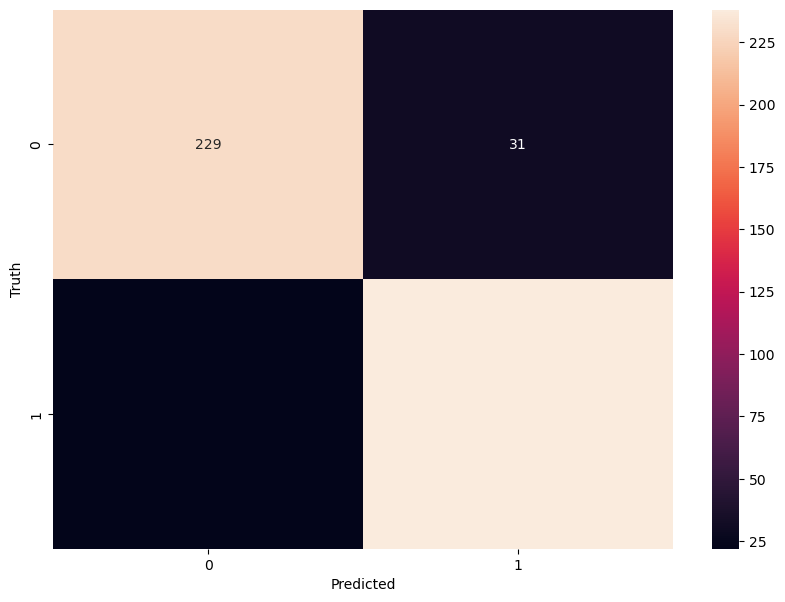

In [ ]:
accuracy_score(y_test, y_pred_nb)
print("NB Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("NB Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("NB Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [ ]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: total: 391 ms
Wall time: 590 ms


DecisionTreeClassifier()

DT Classification Accuracy: 0.8384615384615385
DT Classification Report

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       260
           1       0.84      0.84      0.84       260

    accuracy                           0.84       520
   macro avg       0.84      0.84      0.84       520
weighted avg       0.84      0.84      0.84       520

DT Confusion Matrix

[[217  43]
 [ 41 219]]


Text(95.72222222222221, 0.5, 'Truth')

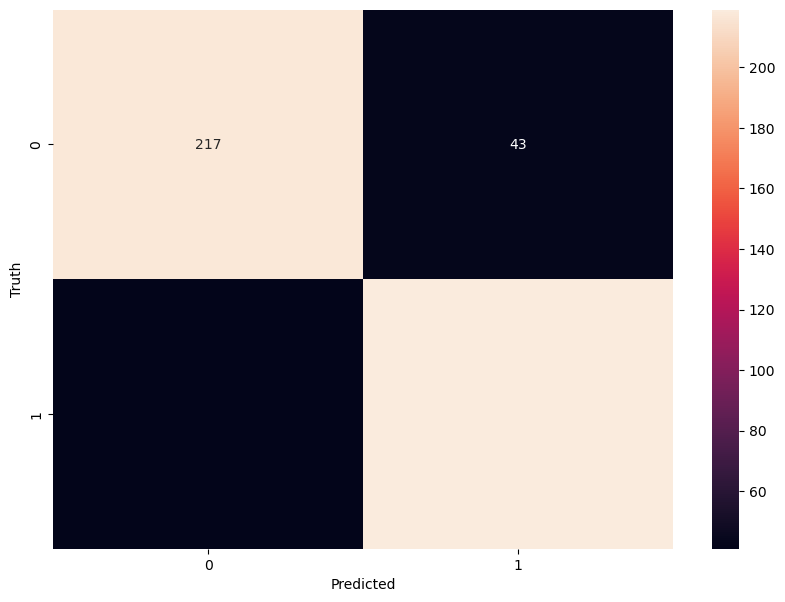

In [ ]:
y_pred_dt = dt.predict(X_test_dtm)
# Model Accuracy
print("DT Classification Accuracy:", accuracy_score(y_test, y_pred_dt))
print("DT Classification Report\n")
print(classification_report(y_test, y_pred_dt))
print("DT Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_dt))

# Confusion Matrix

cm = confusion_matrix(y_test,y_pred_dt)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

SVM Classification Accuracy: 0.8961538461538462
SVM Classification Report

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       260
           1       0.88      0.92      0.90       260

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

SVM Confusion Matrix

[[228  32]
 [ 22 238]]


Text(95.72222222222221, 0.5, 'Truth')

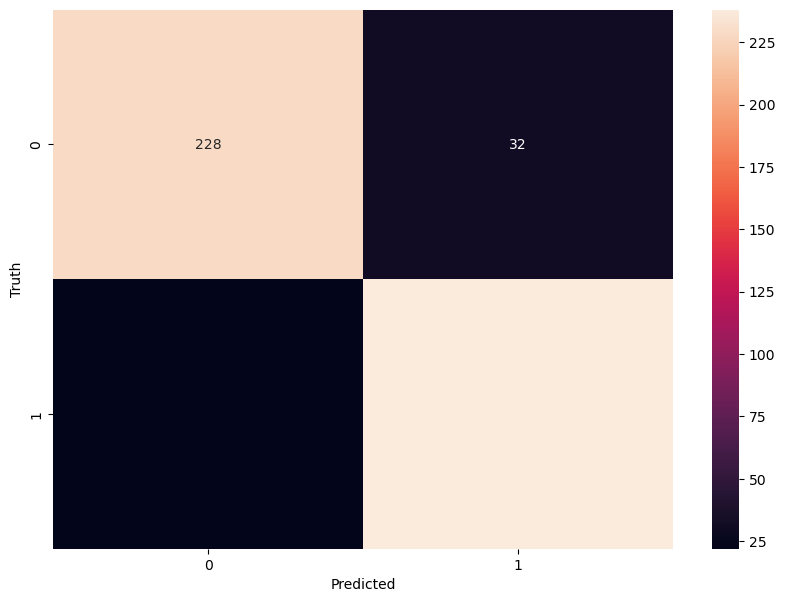

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_dtm, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_dtm)

# Evaluation


print("SVM Classification Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report\n")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_svm))

#confusion matrix
cm = confusion_matrix(y_test,y_pred_svm)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

KNN Classification Accuracy: 0.6884615384615385
KNN Classification Report

              precision    recall  f1-score   support

           0       0.93      0.41      0.57       260
           1       0.62      0.97      0.76       260

    accuracy                           0.69       520
   macro avg       0.78      0.69      0.66       520
weighted avg       0.78      0.69      0.66       520

KNN Confusion Matrix

[[106 154]
 [  8 252]]


Text(95.72222222222221, 0.5, 'Truth')

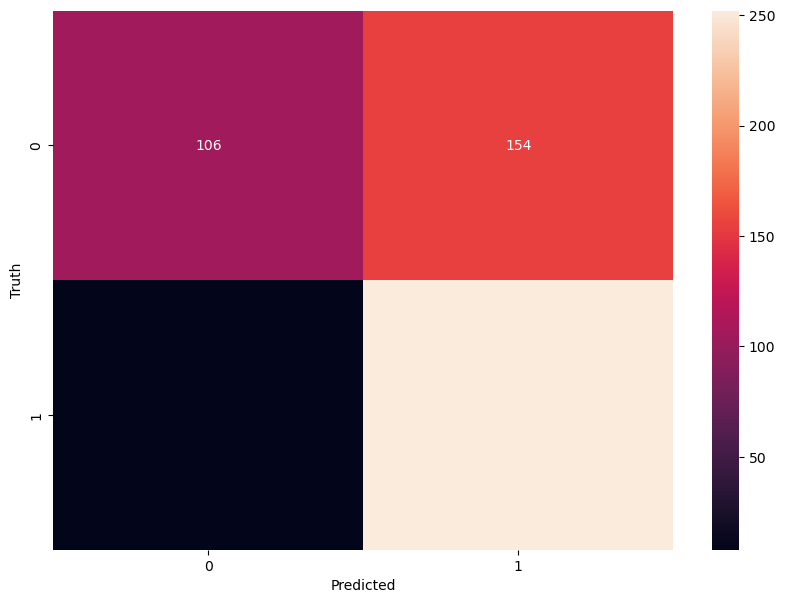

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dtm, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_dtm)

# Evaluation


print("KNN Classification Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report\n")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_knn))

#confusion matrix
cm = confusion_matrix(y_test,y_pred_knn)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

RF Classification Accuracy: 0.8961538461538462
RF Classification Report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       260
           1       0.89      0.90      0.90       260

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

RF Confusion Matrix

[[232  28]
 [ 26 234]]


Text(95.72222222222221, 0.5, 'Truth')

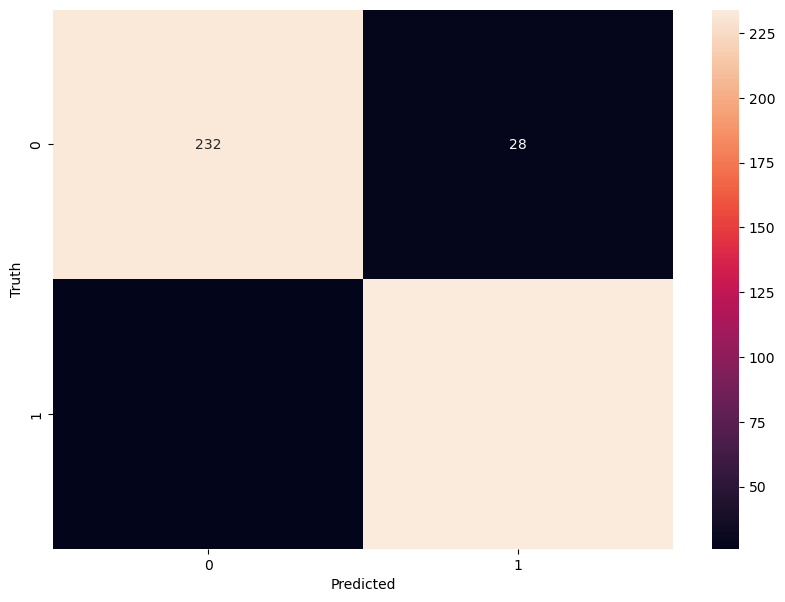

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_dtm, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_dtm)

# Evaluation


print("RF Classification Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF Classification Report\n")
print(classification_report(y_test, y_pred_rf))
print("RF Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_rf))

#confusion matrix
cm = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

MLP Classification Accuracy: 0.9057692307692308
MLP Classification Report

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       260
           1       0.89      0.93      0.91       260

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520

MLP Confusion Matrix

[[230  30]
 [ 19 241]]


Text(95.72222222222221, 0.5, 'Truth')

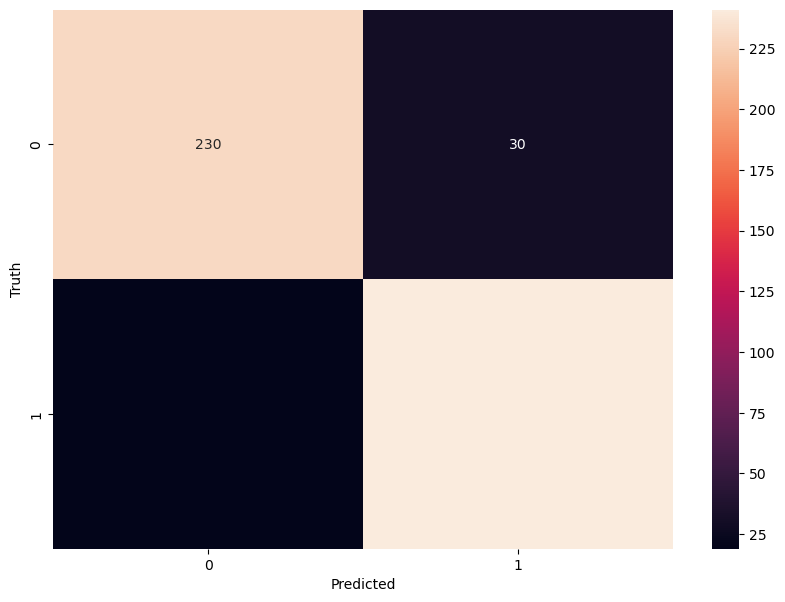

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_dtm, y_train)


# Predictions
y_pred_rf = mlp.predict(X_test_dtm)

# Evaluation


print("MLP Classification Accuracy:", accuracy_score(y_test, y_pred_rf))
print("MLP Classification Report\n")
print(classification_report(y_test, y_pred_rf))
print("MLP Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_rf))

#confusion matrix
cm = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Initialize results storage
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_dtm, y_train)
    y_pred = clf.predict(X_test_dtm)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [accuracy, precision, recall, f1]
    
    print(f"{name} Classifier")
    print("Classification Accuracy:", accuracy)
    print("Classification Report\n", classification_report(y_test, y_pred))
    print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
    print("\n")

Naive Bayes Classifier
Classification Accuracy: 0.8980769230769231
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       260
           1       0.88      0.92      0.90       260

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

Confusion Matrix
 [[229  31]
 [ 22 238]]


Decision Tree Classifier
Classification Accuracy: 0.8519230769230769
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       260
           1       0.84      0.87      0.85       260

    accuracy                           0.85       520
   macro avg       0.85      0.85      0.85       520
weighted avg       0.85      0.85      0.85       520

Confusion Matrix
 [[217  43]
 [ 34 226]]


SVM Classifier
Classification Accuracy: 0.8961538461538462
Classification Repo

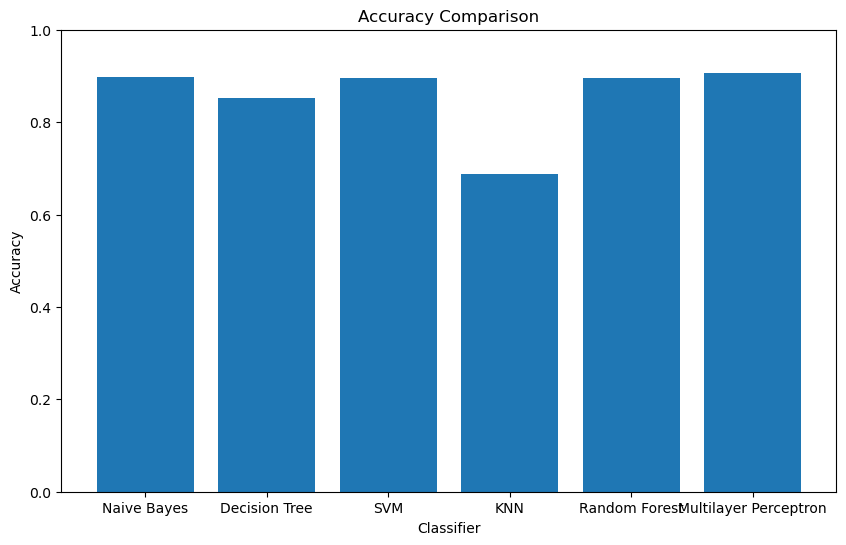

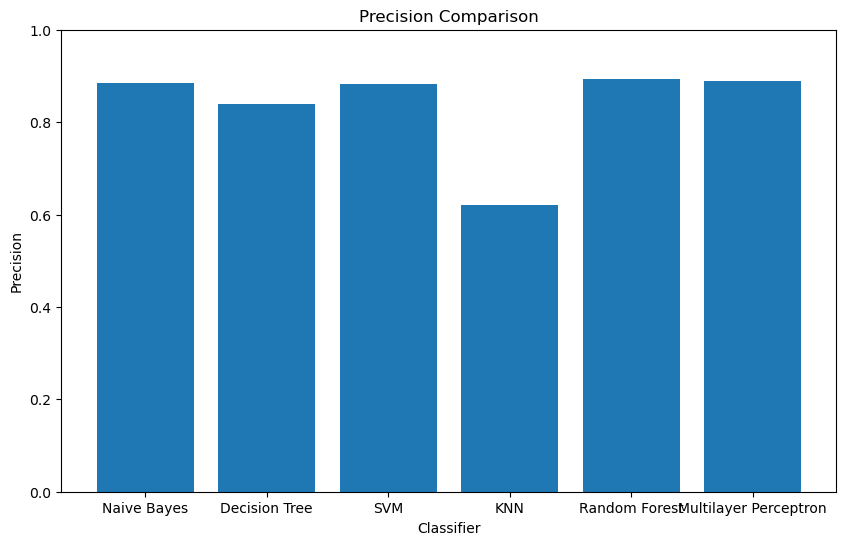

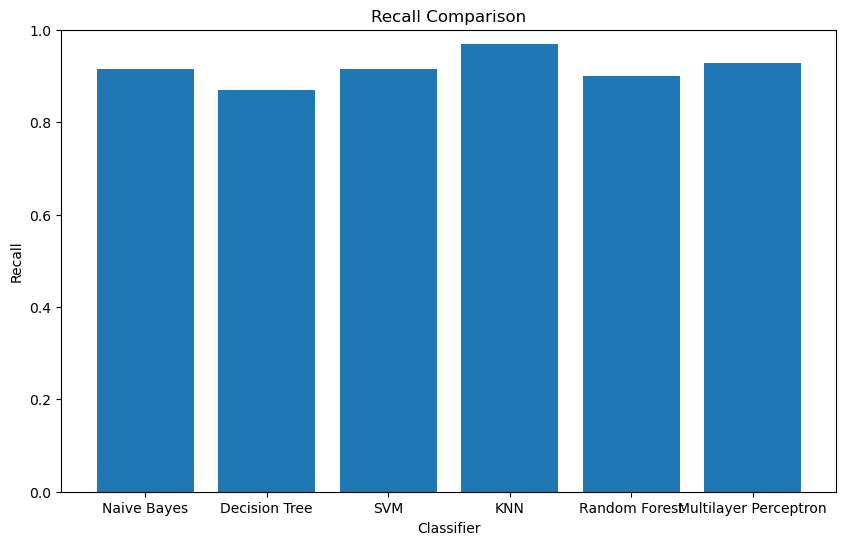

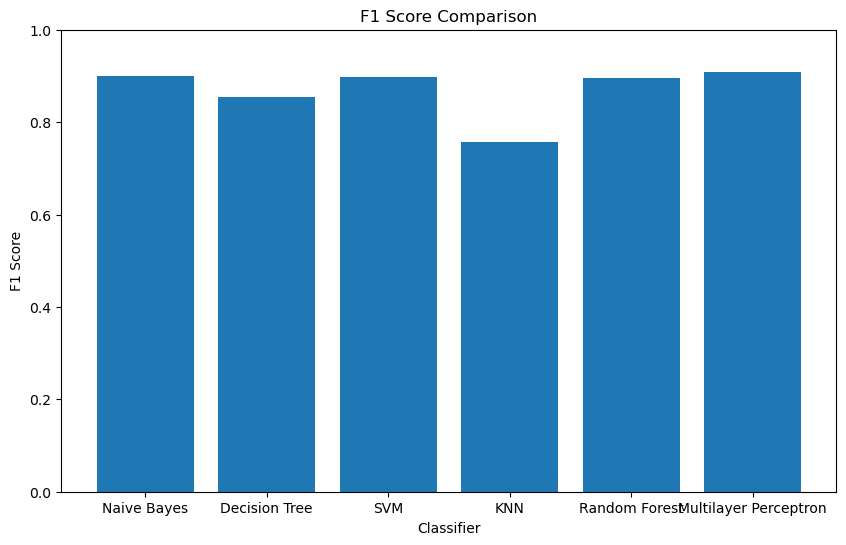

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Multilayer Perceptron": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Initialize results storage
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_dtm, y_train)
    y_pred = clf.predict(X_test_dtm)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [accuracy, precision, recall, f1]
    
    print(f"{name} Classifier")
    print("Classification Accuracy:", accuracy)
    print("Classification Report\n", classification_report(y_test, y_pred))
    print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Plot comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), [results[name][i] for name in results.keys()])
    plt.title(f'{metric} Comparison')
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()

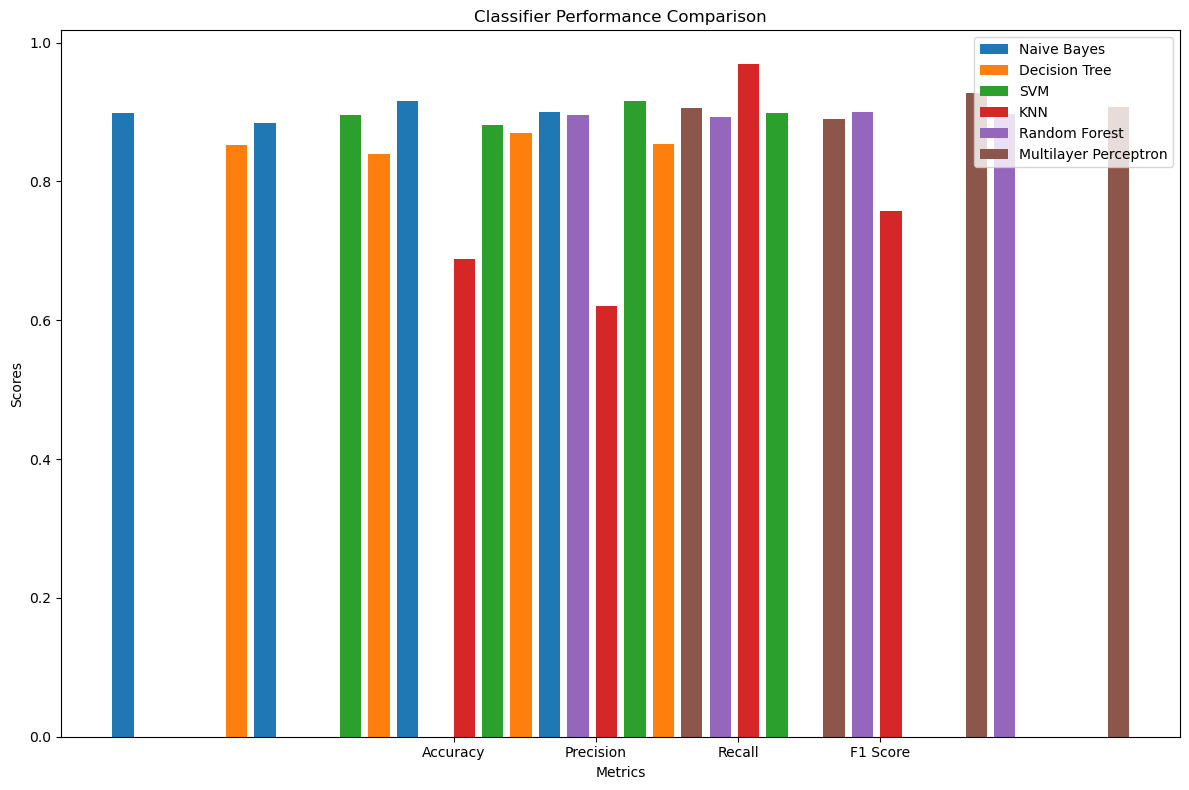

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
n_metrics = len(metrics)
n_classifiers = len(classifiers)

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.15
spacing = 0.05  # space between bars for different metrics
index = np.arange(n_metrics)

for i, (name, scores) in enumerate(results.items()):
    bar_positions = index + i * (bar_width + spacing) * n_metrics
    ax.bar(bar_positions, scores, bar_width, label=name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classifier Performance Comparison')
ax.set_xticks(index + (n_classifiers * (bar_width + spacing) * n_metrics) / 2 - bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

# Function to handle description input
def handle_description():
    description = input("Enter the job description:\n")
    return predict_fake_job_ad(description)

# Function to handle detailed input
def handle_details():
    company_name = input("Enter the Company Name:\n")
    location = input("Enter the Location:\n")
    role = input("Enter the Role:\n")
    # Combine the inputs into one text for prediction
    user_input = f"Company Name: {company_name} Location: {location} Role: {role}"
    return predict_fake_job_ad(user_input)

# Function to clean and process text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

def is_job_posting(text):
    job_keywords = [
        "job", "position", "responsibilities", "requirements", "experience", 
        "skills", "qualifications", "salary", "benefits", "career","accenture","cognizent",
        "deloit","LTImindtree","amazon","microsoft","software devoloper","intel","qualcomm","snapdragon",
        "Broadcom","NVIDIA Corporation","AMD (Advanced Micro Devices)","Samsung Electronics","Micron Technology","Synopsys"]
    text = text.lower()
    return any(keyword in text for keyword in job_keywords)

def fake_posting(text):
    fake_keywords = [
        "mars","iare","pluto", "saturn","sun","moon",]
    text = text.lower()
    return any(keyword in text for keyword in fake_keywords)
    
# Placeholder for the predict function
def predict_fake_job_ad(text):
    if not is_job_posting(text):
        print("\033[1mInput does not resemble a typical job posting.\033[0m")
    if fake_posting(text):
        print("\033[1mInput does not resemble a typical job posting.\033[0m")
        
    input_text = clean_text(text)
    input_data_features = vect.transform([input_text])
    # For demonstration purposes, we assume 'vect' and 'dt' are predefined and trained
    # input_data_features = vect.transform([input_text])
    
    if len(input_text.split()) < 5:  # Example threshold: input should have at least 5 words
        print("\033[1mSuspicious: Input too short to be a job description.\033[0m")
    
    # Example prediction logic, replace with actual model prediction
    # prediction = dt.predict(input_data_features)
    prediction = mlp.predict(input_data_features)
    
    if prediction[0] == 1:
        print("\033[1mFraudulant Job\033[0m")
    else:
        print("\033[1mReal Job\033[0m")

# Main function to select input type
def main():
    print("Select an option:")
    print("1. Enter a job description")
    print("2. Enter job details (Company Name, Location, Role)")
    
    option = input("Enter the number of your choice:\n")
    
    # Dictionary to simulate switch-case
    switcher = {
        "1": handle_description,
        "2": handle_details,
    }
    
    # Get the function based on user input
    func = switcher.get(option, lambda: "Invalid option! Please select Valid Option")
    
    # Execute the chosen function
    result = func()
    print(result)

if __name__ == "__main__":
    main()






# convert text to feature vectors
#input_data_features = vect.transform(input_text)


    
# making prediction

#prediction = dt.predict(input_data_features)
#print(prediction)


#if (prediction[0]==1):
  #print('Real Job')
    

#else:
  #print('Fraudulant Job')

: 